# Predicting Customer Churn in SyriaTel: Project 

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 


### Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

### Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

## BUSINESS UNDERSTANDING

## 1.1 BUSINESS OVERVIEW
The telecom business develops and operates communication systems such as mobile, fixed-line, and internet services. It has rapidly evolved with shifts like 5G, rising customer expectations, and stiff competition. Despite spanning diverse sectors, all rely on digital infrastructure and data-driven strategies. Key challenges include customer churn and fraud, making it vital to close loopholes and base decisions on data insights.

## 1.2 Business understanding 
In telecom companies like SyriaTel, customer churn threatens revenue and market position in a competitive sector. Retaining customers is vital, but without understanding why they leave, the company risks continued losses. This project uses customer data to generate insights that improve retention, reduce churn, and support long-term growth.

## 1.3 Business Objectives
## 1.3.1 Main objective
The main objective of this project is to help SyriaTel, a telecommunication company, reduce revenue loss caused by customer churn by developing a predictive model that identifies customers who are most likely to leave.

### 1.3.2 SPECIFIC OBJECTIVES
1) Explore the cutomer data to identify trends and patterns that influence churn.
2) Preprocess the data by handling missing values, encoding categorical features and create new features with respect to customer behavior.
3) Build and train diffent classification models that will predict customer churn.
4) Evaluate the model perfomance.
5) Identify the most significant features that will provide actionable insights with respect to churn.
6) Provide recommendations to stakeholders for customer retention strategies.

### 1.3.2 RESEARCH QUESTIONS
1) What are the key factors that influence churn at SyrilTel?
2) Which classification model perfoms best to predict customer churn likelihood?
3) How do customer usage habits, billing trends, and service experiences compare between churners and non-churners?
4) Which strategies can be adopted by the company based on findings, to reduce churn and improve customer retention?

### 1.3 SUCCESS CRITERIA
To build a classification model that:
* Predicts whether a customer is likely to stay or churn.
* Provides interpretable insights into the key factors influencing churn, to support customer retention strategies.

### 2.0 DATA UNDERSTANDING
* The dataset was sourced from Kaggle. (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)
* It consists of 3333 records and 21 fields.
* The dataset consists of float, integer, boolean, and object data types.
* The dataset contains information on customer data across different states, including their usage behavior, subscription plans, and churn status.
* The column names are
  
      1) State -state where the customer resides
      2) Account length -Period the customer has had the account for.
      3) Area code -Telephone area code of the customer
      4) Phone number - Customer's telephone number
      5) International plan -Whether the customer has an international calling plan (yes/no)
      6) Voice mail plan -Whether the customer has a voice mail plan (yes/no)
      7) Number vmail messages -Number of voicemail messages sent or received
      8) Total day minutes - Total minutes of calls made during the day
      9) Total day calls - Total number of calls made during the day
      10) Total day charge - Total charges for daytime calls
      11) Total eve minutes-Total minutes of calls made during the evening
      12) Total eve calls -Total number of calls made during the evening
      13) Total eve charge -Total charges for evening calls
      14) Total night minutes -Total minutes of calls made during the night
      15) Total night calls -Total number of calls made during the night
      16) Total night charge -Total charges for night calls
      17)Total intl minutes -Total minutes spent on international calls.-
      18) Total intl calls -Total number of international calls.
      19) Total intl charge - Total cost charged for international calls.
      20)Customer service calls-Number of times the customer called customer service.
      21) Churn -Whether the customer left the company

## 3.0 DATA PREPARATION

In [2]:
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 3.1 Data cleaning 

# 3.2 Identifying null values 


In [3]:
df.isna().idxmax()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

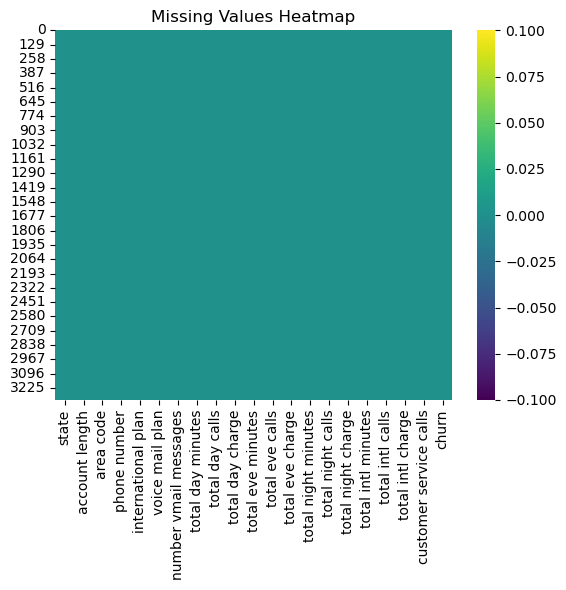

In [4]:
#using seaborn to check missing values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

## 3.3 No duplicated 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## 3.4 Checking duplicates

In [6]:
df.duplicated().idxmax()

0

## No duplicates in the data set


## 3.5 Identifying the shape

In [7]:
df.shape

(3333, 21)

## the Data set has 3333 data rows and 21 rows

## 3.6 Dropping some columns

In [8]:
df.drop(["phone number","area code","state"],axis=1,inplace=True)

## 3.7 Describing df

In [9]:
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 4.0 Feature engineering

In [10]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 4.1Finding the average minutes from the daily callings 

In [11]:
#find the average minutes
#first add the minutes
#second find their average
#third, drop the columns 
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['avg_minutes'] = (df['total_minutes'] / 3).round(2)
df = df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total_minutes'], axis=1)

## 4.2 Finding avg for the callings 

In [12]:
#first add the calls
#second , find the average
#drop the columns
df["total_calls"]=df["total day calls"]+df["total eve calls"]+df["total night calls"]
df["avg_calls"]=(df["total_calls"]/3).round(2)
df.drop(["total day calls","total eve calls","total night calls","total_calls"],axis=1,inplace=True)

## 4.3 Avg call duration

In [13]:
df['avg_call_duration'] = (df['avg_minutes']/df["avg_calls"]).round(2)

In [14]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day charge,total eve charge,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg_minutes,avg_calls,avg_call_duration
0,128,no,yes,25,45.07,16.78,11.01,10.0,3,2.70,1,False,235.73,100.00,2.36
1,107,no,yes,26,27.47,16.62,11.45,13.7,3,3.70,1,False,203.83,109.67,1.86
2,137,no,no,0,41.38,10.30,7.32,12.2,5,3.29,0,False,175.73,109.33,1.61
3,84,yes,no,0,50.90,5.26,8.86,6.6,7,1.78,2,False,186.07,82.67,2.25
4,75,yes,no,0,28.34,12.61,8.41,10.1,3,2.73,3,False,167.30,118.67,1.41


## 4.4Finding charges avg


In [15]:
#first, add avg charges
#second, find the avg
#third, drop the columns
df["total_charge"]=df["total day charge"]+df["total eve charge"]+df["total night charge"]
df["avg_charge"]=(df["total_charge"]/3).round(2)
df.drop(["total day charge","total eve charge","total night charge","total_charge"],axis=1,inplace=True)

## 4.6 service intensity 

In [16]:
#finding the percentage service intencity with customer service calls over avg calls
df["%_srv_intency"]=((df["customer service calls"]/df["avg_calls"])*100).round(2)
df["%_intl_srv_intensity"]=((df["customer service calls"]/df["total intl calls"])*100).round(2)

In [17]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg_minutes,avg_calls,avg_call_duration,avg_charge,%_srv_intency,%_intl_srv_intensity
0,128,no,yes,25,10.0,3,2.70,1,False,235.73,100.00,2.36,24.29,1.00,33.33
1,107,no,yes,26,13.7,3,3.70,1,False,203.83,109.67,1.86,18.51,0.91,33.33
2,137,no,no,0,12.2,5,3.29,0,False,175.73,109.33,1.61,19.67,0.00,0.00
3,84,yes,no,0,6.6,7,1.78,2,False,186.07,82.67,2.25,21.67,2.42,28.57
4,75,yes,no,0,10.1,3,2.73,3,False,167.30,118.67,1.41,16.45,2.53,100.00


## 4.7outputing the new data frame


In [18]:
df.to_csv('df2.csv')

## 5.0 EXPLORATORY DATA ANALYSIS

In [19]:
df2=pd.read_csv("df2.csv")
df2.head()

,Unnamed: 0,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg_minutes,avg_calls,avg_call_duration,avg_charge,%_srv_intency,%_intl_srv_intensity
0,0,128,no,yes,25,10.0,3,2.70,1,False,235.73,100.00,2.36,24.29,1.00,33.33
1,1,107,no,yes,26,13.7,3,3.70,1,False,203.83,109.67,1.86,18.51,0.91,33.33
2,2,137,no,no,0,12.2,5,3.29,0,False,175.73,109.33,1.61,19.67,0.00,0.00
3,3,84,yes,no,0,6.6,7,1.78,2,False,186.07,82.67,2.25,21.67,2.42,28.57
4,4,75,yes,no,0,10.1,3,2.73,3,False,167.30,118.67,1.41,16.45,2.53,100.00


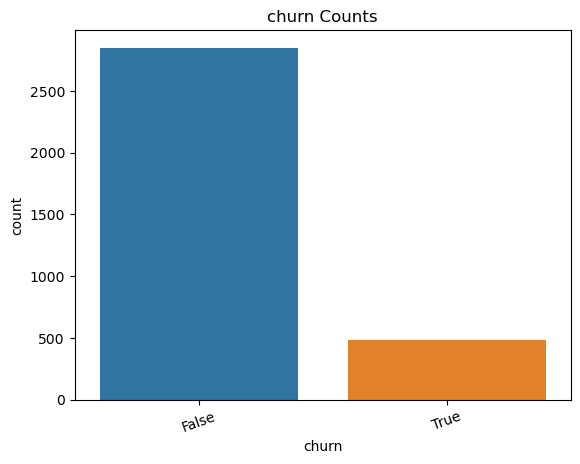

In [20]:
#Counting of the churn ,True and False 
sns.countplot(x='churn', data=df2)
plt.title("churn Counts")
plt.xticks(rotation=20)
plt.show()

### churn is a boolean variable:

### True (or 1) → The customer left/canceled service.

### False (or 0) → The customer stayed.
* There exists data Imbalance 

Text(0.5, 1.0, 'Churn Rate by International Plan')

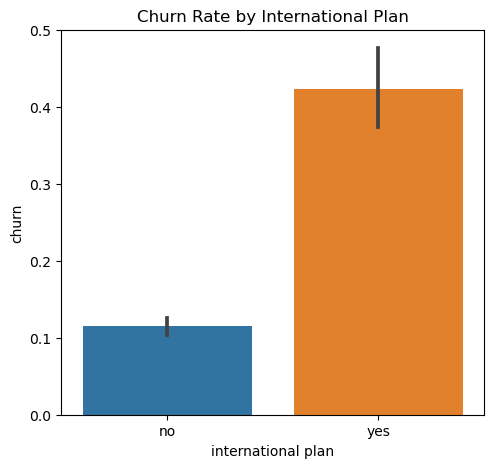

In [21]:
#International plan over churn
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x="international plan", y="churn", data=df)
plt.title("Churn Rate by International Plan")

### No international plan → relatively low churn rate.

### Yes international plan → significantly higher churn rate.
### Customers with an international plan often churn more frequently than those without.

### Why?

#### Higher bills: International calls can be costly, leading to bill shock.

## 5.1 change churn to interger

In [22]:
#changing churn to interger
df2["churn"]=df2["churn"].astype(int)
#changing international plan to interger
df2["international plan"] = df2["international plan"].str.strip().str.lower().map({"yes": 1, "no": 0})
#changing voice mail plan to interger
df2["voice mail plan"] = df2["voice mail plan"].str.strip().str.lower().map({"yes": 1, "no": 0})

In [23]:
df2.head()

,Unnamed: 0,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,avg_minutes,avg_calls,avg_call_duration,avg_charge,%_srv_intency,%_intl_srv_intensity
0,0,128,0,1,25,10.0,3,2.70,1,0,235.73,100.00,2.36,24.29,1.00,33.33
1,1,107,0,1,26,13.7,3,3.70,1,0,203.83,109.67,1.86,18.51,0.91,33.33
2,2,137,0,0,0,12.2,5,3.29,0,0,175.73,109.33,1.61,19.67,0.00,0.00
3,3,84,1,0,0,6.6,7,1.78,2,0,186.07,82.67,2.25,21.67,2.42,28.57
4,4,75,1,0,0,10.1,3,2.73,3,0,167.30,118.67,1.41,16.45,2.53,100.00


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total intl minutes      3333 non-null   float64
 6   total intl calls        3333 non-null   int64  
 7   total intl charge       3333 non-null   float64
 8   customer service calls  3333 non-null   int64  
 9   churn                   3333 non-null   int64  
 10  avg_minutes             3333 non-null   float64
 11  avg_calls               3333 non-null   float64
 12  avg_call_duration       3333 non-null   float64
 13  avg_charge              3333 non-null   float64
 14  %_srv_intency           3333 non-null   

## 5.2 plotting the correlation of the variables

In [25]:
# displaying the correlation of the variable to churn
correlations = df2.corr(numeric_only=True)["churn"].sort_values(ascending=False)
print(correlations)


churn                     1.000000
international plan        0.259852
avg_charge                0.226968
customer service calls    0.208750
%_intl_srv_intensity      0.205046
%_srv_intency             0.201701
avg_minutes               0.196457
avg_call_duration         0.140939
total intl charge         0.068259
total intl minutes        0.068239
Unnamed: 0                0.040232
avg_calls                 0.019650
account length            0.016541
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


## 5.2 Heatmap plot

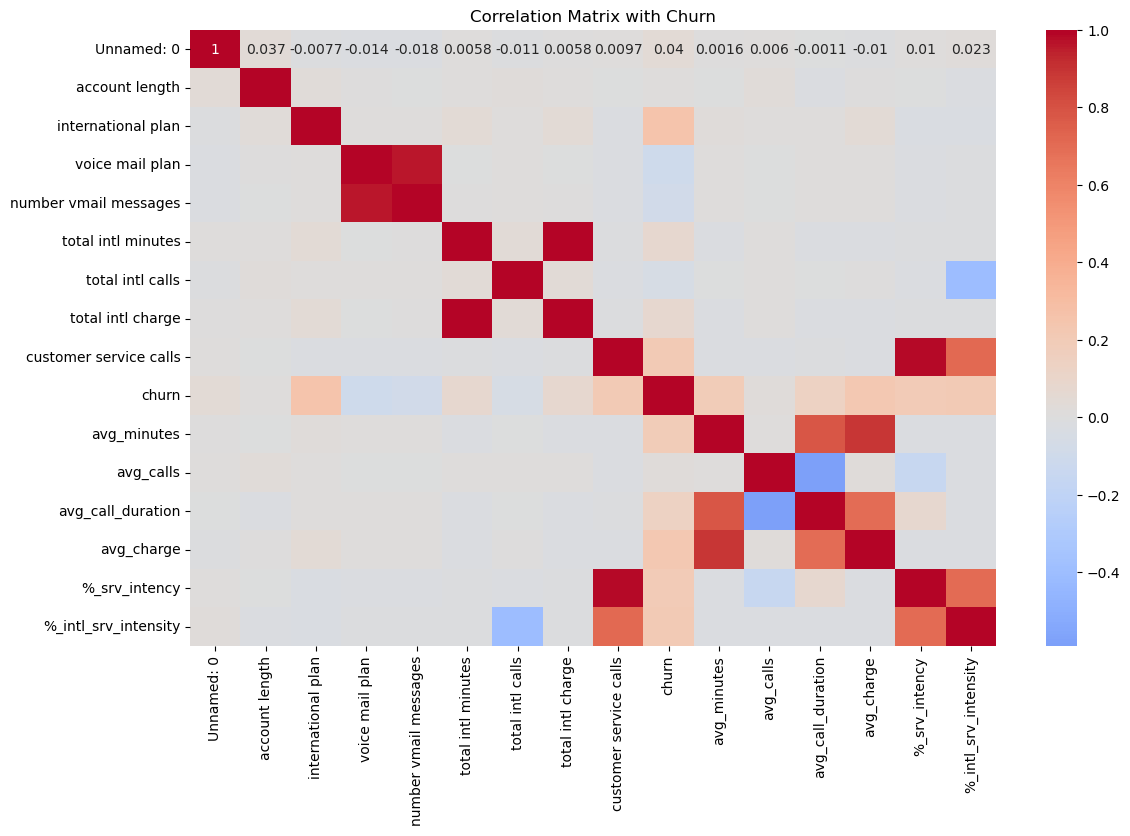

In [26]:
#plotting of the heart map plot 
corr = df2.corr(numeric_only=True)

plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix with Churn")
plt.show()

## 5.3 Scatter plot 

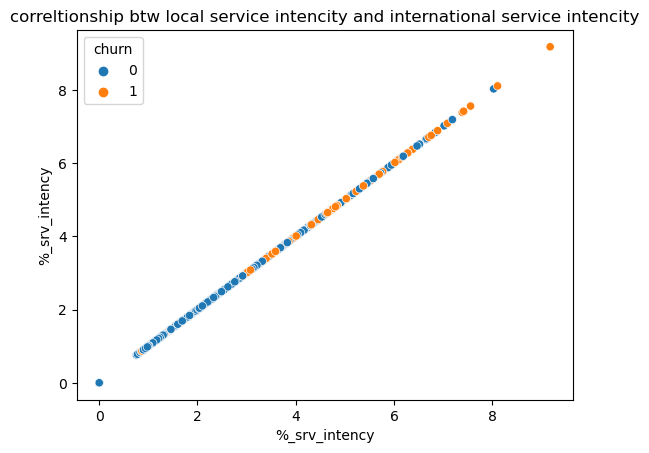

In [27]:
#scatter plot over customer services, both international and local
sns.scatterplot(x=df2['%_srv_intency'], y=df2['%_srv_intency'],hue="churn" ,data=df2)
plt.title("correltionship btw local service intencity and international service intencity")
plt.show()

## There is a positive correlation between local client customers service intencity to that of the international 

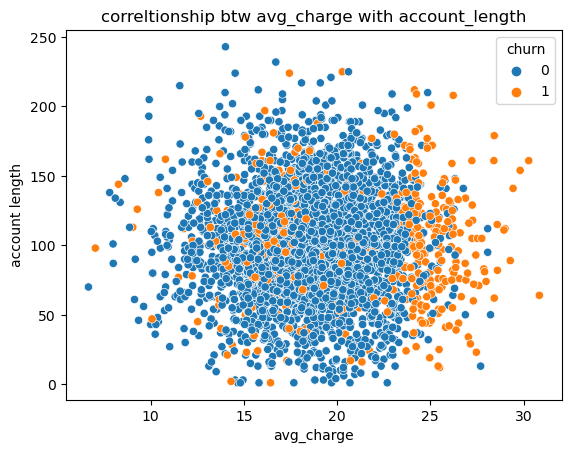

In [28]:
#correlationship between avg_charge with account lenght 
sns.scatterplot(x=df2["avg_charge"], y=df2['account length'],hue="churn" ,data=df2)
plt.title("correltionship btw avg_charge with account_length")
plt.show()

### There is a week positive correlation between the account lenght and avg_charges

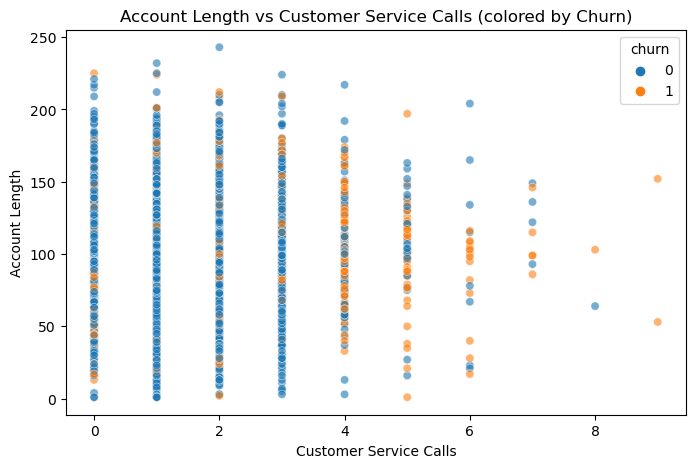

In [29]:
#plotting of the account lenght and customer service over churn
plt.figure(figsize=(8,5))
sns.scatterplot(x="customer service calls", y="account length", hue="churn", data=df2, alpha=0.6)
plt.title("Account Length vs Customer Service Calls (colored by Churn)")
plt.ylabel("Account Length")
plt.xlabel("Customer Service Calls")
plt.show()

## 5.4 Bah grapghs 

### customers with the highest number of customers services were likely to churn from the service 

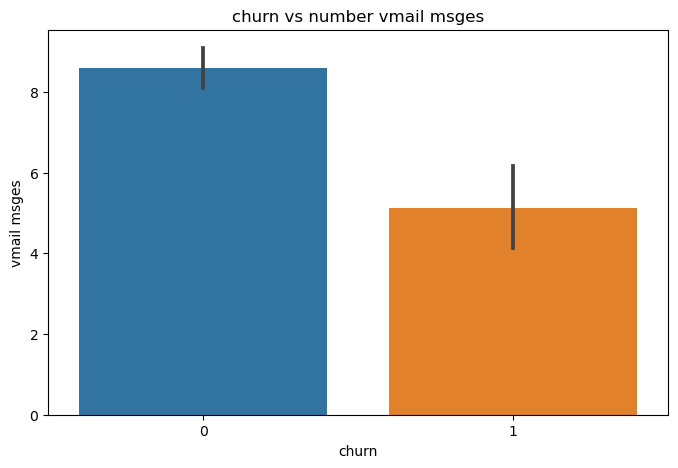

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x="churn", y="number vmail messages", data=df2)
plt.title("churn vs number vmail msges")
plt.ylabel("vmail msges")
plt.xlabel("churn")
plt.show()

### clients with vmails msges were lickly to retain in the services
### The company to increase the use of the vmail messages

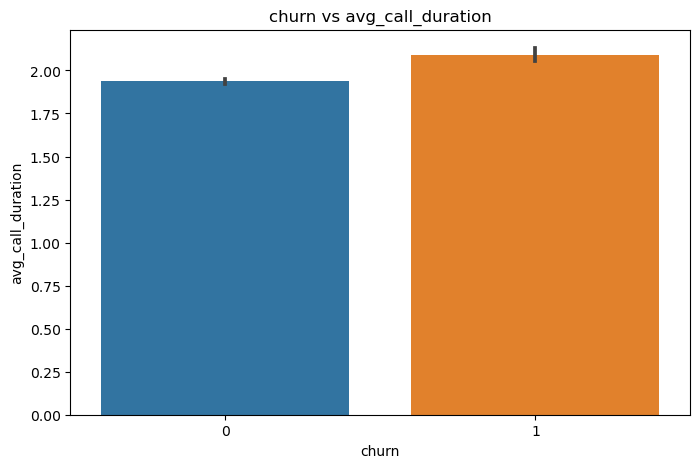

In [31]:
#churn vs call duration
plt.figure(figsize=(8,5))
sns.barplot(x="churn", y="avg_call_duration", data=df2)
plt.title("churn vs avg_call_duration")
plt.ylabel("avg_call_duration")
plt.xlabel("churn")
plt.show()

### CONC: clients with the highest number of calls duration are highly churned from the services , due to the too much consuption of resources 


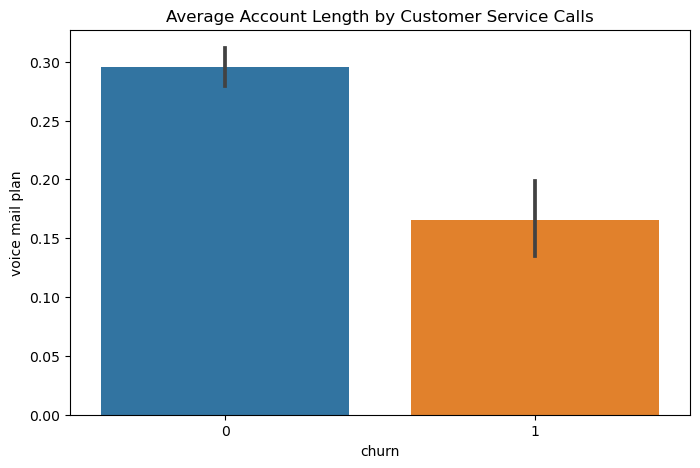

In [32]:
# Account length vs customer services 
plt.figure(figsize=(8,5))
sns.barplot(x="churn", y="voice mail plan", data=df2)
plt.title("Average Account Length by Customer Service Calls")
plt.ylabel("voice mail plan")
plt.xlabel("churn")
plt.show()

## 5.5 Box plot 

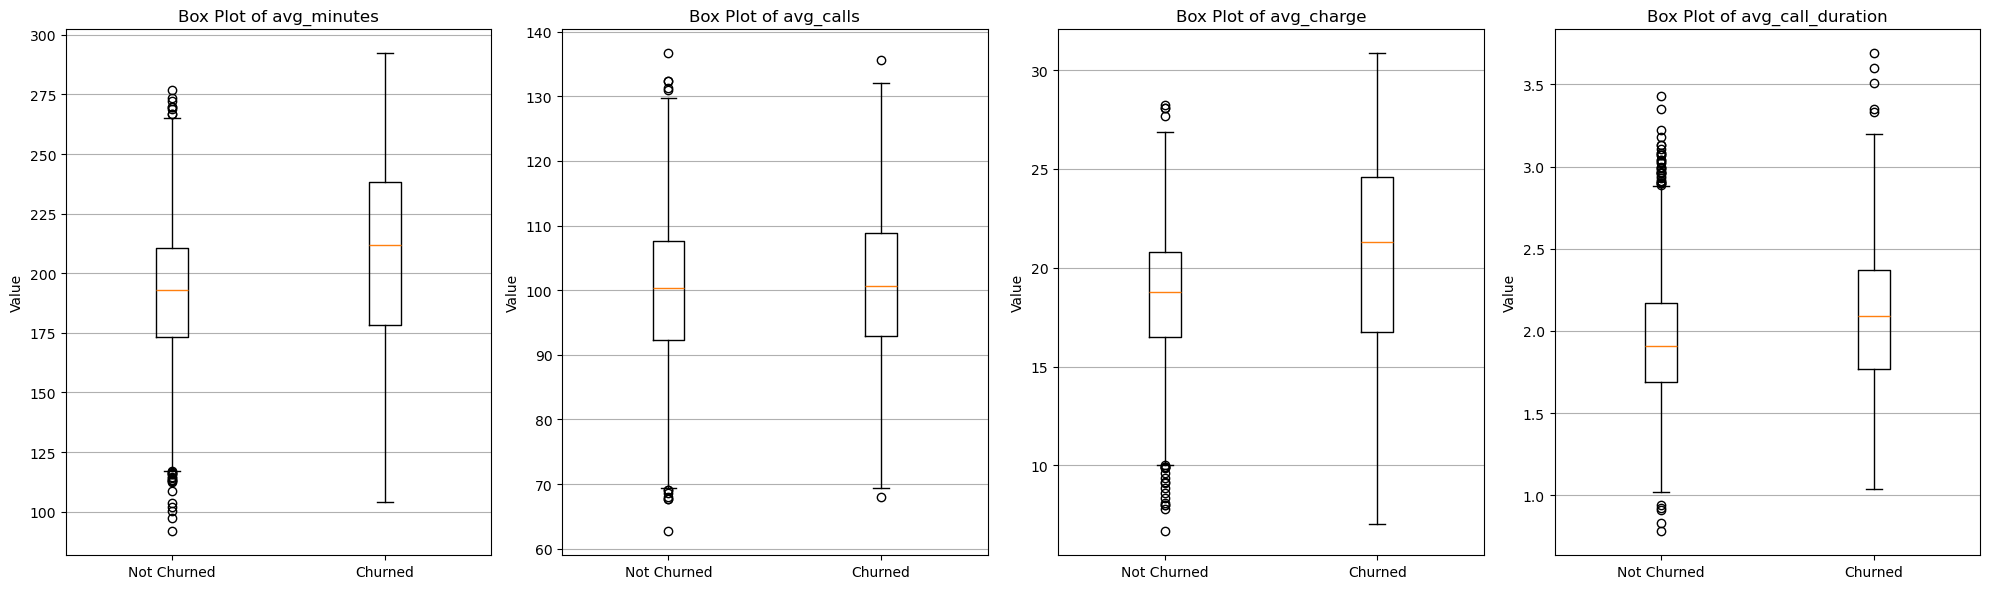

In [33]:
 # plotting of the local clients' users  box plot

df_churned = df2[df2['churn'] == True] # Separate the dataframe into two groups based on the 'churn' column
df_not_churned = df2[df2['churn'] == False]

numerical_cols = ['avg_minutes', 'avg_calls', 'avg_charge', 'avg_call_duration']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(20, 6), sharey=False)

# Loop through each column and create a box plot
for i, col in enumerate(numerical_cols):
    data_to_plot = [df_not_churned[col].dropna(), df_churned[col].dropna()]
    ax = axes[i]
    ax.boxplot(data_to_plot, labels=['Not Churned', 'Churned'])
    ax.set_title(f'Box Plot of {col}', fontsize=12)
    ax.set_ylabel('Value')
    ax.grid(axis='y')

plt.tight_layout()

# Save the plot
plt.savefig('churn_box_plots.png')


### charges box plt has the highest number of churned, the company need to put into consideration of the charges prices to retain clients 

###  voice mail is likely to reduce churn, the voice mail need to be cooperated in the company system

## 5.6 Filling the null values 

In [34]:
#filling the misising values 
#Handle missing values in '%_intl_srv_intensity' by filling with the mean
df2['%_intl_srv_intensity'] = df2['%_intl_srv_intensity'].fillna(df2['%_intl_srv_intensity'].mean())

In [35]:
df2.isna().sum()

Unnamed: 0                0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
avg_minutes               0
avg_calls                 0
avg_call_duration         0
avg_charge                0
%_srv_intency             0
%_intl_srv_intensity      0
dtype: int64

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total intl minutes      3333 non-null   float64
 6   total intl calls        3333 non-null   int64  
 7   total intl charge       3333 non-null   float64
 8   customer service calls  3333 non-null   int64  
 9   churn                   3333 non-null   int64  
 10  avg_minutes             3333 non-null   float64
 11  avg_calls               3333 non-null   float64
 12  avg_call_duration       3333 non-null   float64
 13  avg_charge              3333 non-null   float64
 14  %_srv_intency           3333 non-null   

# 6.0 Training model using the logistic Regressison

### our training is based on the prediction of the number of clients that subscriped to churn using the logistic model

In [37]:
#importing the libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [38]:
#define the target variable first
#we will use out target variable as churn

In [39]:
#dropping churn from the x variables
X = df2.drop("churn", axis=1)  
y = df2["churn"]

In [40]:
# Identify categorical columns for one-hot encoding
categorical_cols = ['international plan', 'voice mail plan']

In [41]:
# One-hot encode the categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

## 6.1 Replacing the infinite and finite

In [42]:
# Replace inf/-inf with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Fill NaN values with column mean
X = X.fillna(X.mean())

# Ensuring y matches cleaned X
y = y.loc[X.index]

## 6.2 Data splitting, Accuracy test, confussion matrix and Classification report 

In [43]:
#splitting the data by 20:80 ,testing and training

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# fitting the model 
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [46]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [47]:
#finding the general accuracy 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8590704647676162


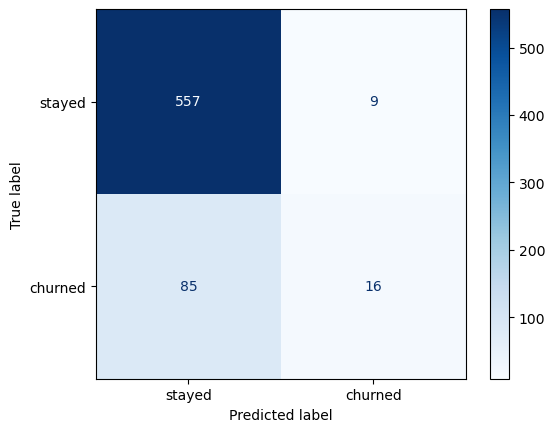

In [48]:
#Plotting the confusion matrix 
cfm=confusion_matrix(y_test,y_pred)                
labels=["stayed","churned"]
disp=ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=labels)
disp.plot(cmap="Blues");

In [49]:
#finding the classification report from the confusion matrix 
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.64      0.16      0.25       101

    accuracy                           0.86       667
   macro avg       0.75      0.57      0.59       667
weighted avg       0.83      0.86      0.82       667



## Classification report obsrevation

### The model's accuracy is 86%. This means that the model correctly predicted whether a customer would churn or not 860 times out of 1000 instances in the  test dataset.
* 0 - not-churned
* 1 - churned
* Precision- It focuses on the quality of the model's predictions, not churned,87%, churned,64%
* Recall    - It measures how good the model is at predicting positives, not churned(98%), churned(16%)
* F1-score  - It combines precision and recall into a single metric to balance the trade-off, not churned (92%), churned(25%)
 * Support   - The number of actual customers in each category within your test set. There were 566 non-churned and 101 churned customers, showing an imbalanced dataset.


## 7.1.1 Decision tree 

In [50]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay 

## 7.1.2 Fitting decision tree model ,finding Accuracy,Confusion matrix,and classification report 

In [51]:
#building a decision tree
tr_mdl = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)
tr_mdl.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [52]:
#predicting the accuracy and the evaluation
y_pred = tr_mdl.predict(X_test)

In [53]:
#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9460269865067467


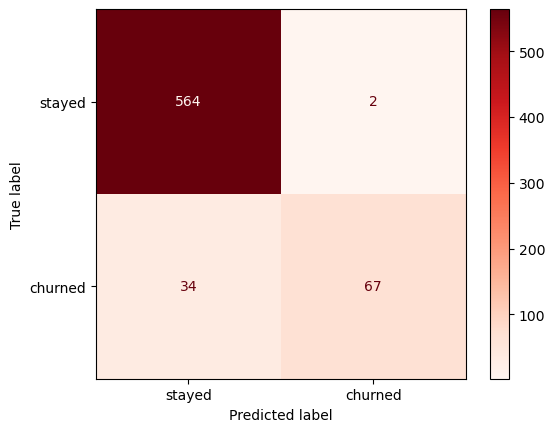

In [54]:
#plotting Confusion matrix 

cfm=confusion_matrix(y_test,y_pred)                
labels=['stayed','churned']
disp=ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=labels)
disp.plot(cmap='Reds');

In [55]:
#classification report 
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       566
           1       0.97      0.66      0.79       101

    accuracy                           0.95       667
   macro avg       0.96      0.83      0.88       667
weighted avg       0.95      0.95      0.94       667



## 7.2 Plotting the decision tree

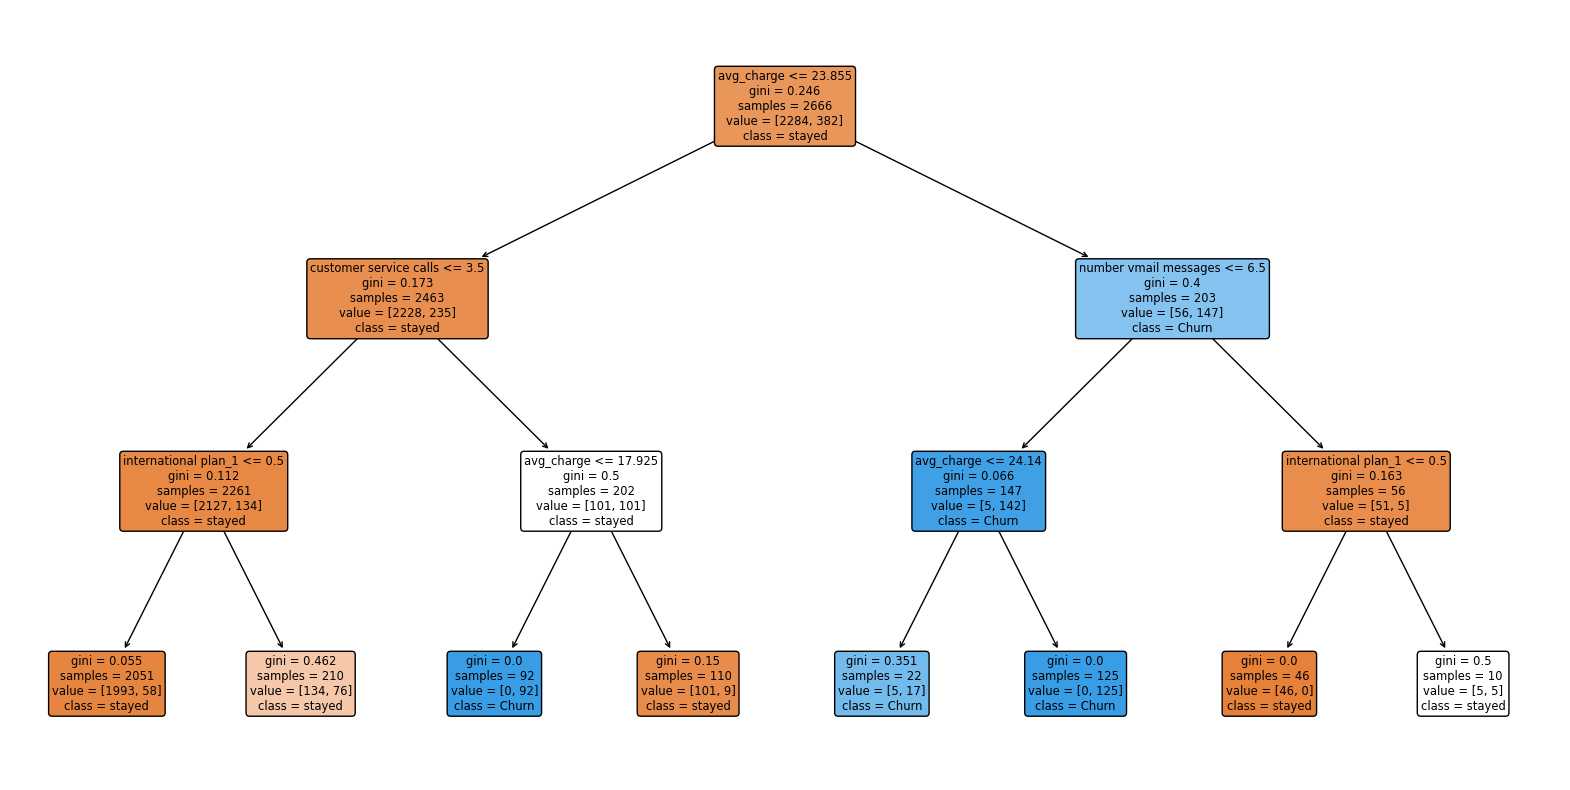

In [56]:
#plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(tr_mdl,feature_names=X.columns,class_names=["stayed", "Churn"],filled=True, rounded=True)
plt.show()

## 7.3.0 Handling data imbalance by SMOTE(Synthetic Minority Over-sampling Technique)

#### SMOTE generates synthetic instances for the minority class by interpolating between neighboring instances.
#### This approach creates new, realistic data points and helps prevent overfitting compared to random oversampling.

In [57]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data only
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

### 7.3.1 Traning data on the resampled data, Accuracy, confusion matrix and classisfication report

In [67]:
# Train decision tree on resampled data
tree_smote = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_smote.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [59]:
#perform  prediction on the resampled data
y_pred = tree_smote.predict(X_test)

In [60]:
#finding out the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8710644677661169


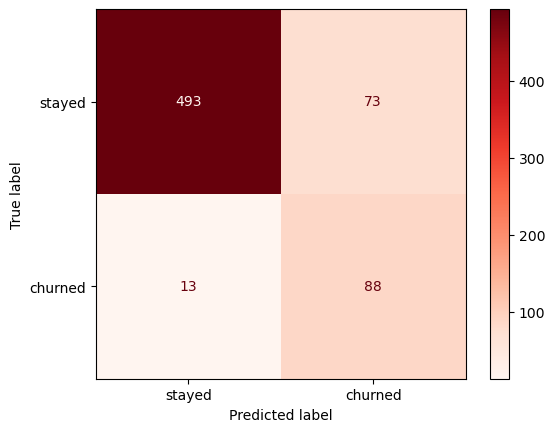

In [61]:
#plotting the Confusion matrix on the resample data

cfm=confusion_matrix(y_test,y_pred)                
labels=['stayed','churned']
disp=ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=labels)
disp.plot(cmap='Reds');

In [62]:
#performing the report clarification
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       566
           1       0.55      0.87      0.67       101

    accuracy                           0.87       667
   macro avg       0.76      0.87      0.80       667
weighted avg       0.91      0.87      0.88       667



## 7.3.2 Confusion matrix 
* 493 (True Negatives, TN)
         -493 customers actually stayed, and the model correctly predicted them as staying.
* 73 (False Positives, FP)
         -73 customers actually stayed, but the model incorrectly predicted they would churn.
* 13 (False Negatives, FN)
        -13 customers actually churned, but the model predicted they would stay.
* 88 (True Positives, TP)   
        -88 customers actually churned, and the model correctly predicted churn

## 7.3.3Classification Report
#### Performance on majory class(0-stayed)

1) Precision = 0.97: When the model predicts a customer will stay, it is correct 97% of the time. This is excellent
2) Recall = 0.87: The model correctly identifies 87% of all customers who actually stayed. This is good.

#### Performance on the minority class(1-churned)
1) Precision = 0.55: This is low. When the model predicts a customer will churn, it is only correct 55% of the time. Almost half of the   alarms it raises are false alarms.
2) Recall = 0.87: This is very high. The model successfully catches 87% of all customers who actually churn. It's missing very few true churners.

## 7.3.4 Conclution 
####   The second model, Matrix 2, is the better choice. Because in churn problems, missing churners (false negatives) is much worse than a few false alarms
#### Also, the Model is excellent at catching churners (87% recall)

## 7.4 Resampled Data Decision tree

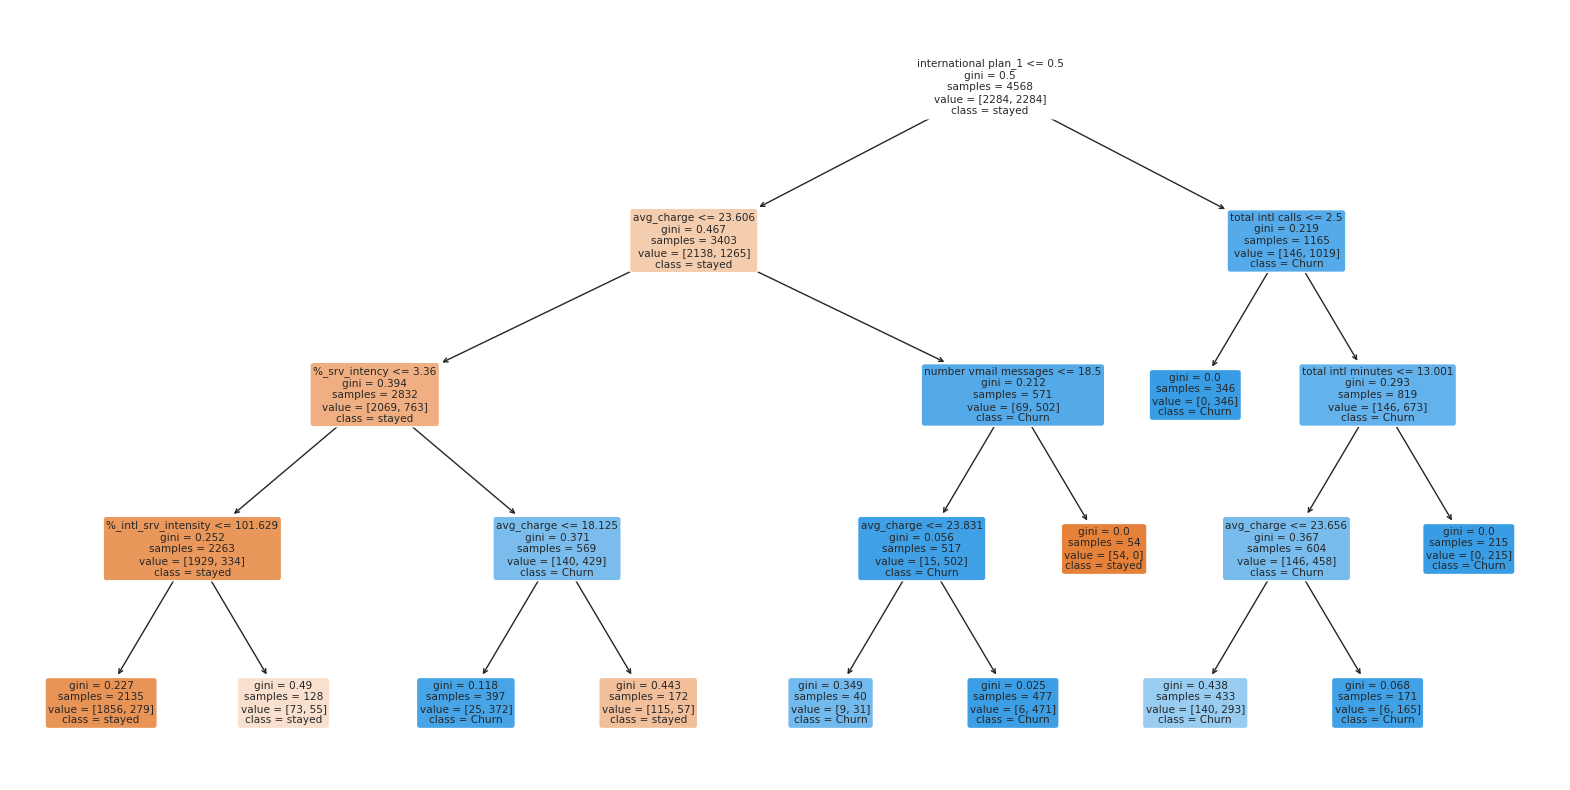

In [68]:
#plotting the decision tree of the resampled data 
plt.figure(figsize=(20,10))
plot_tree(tree_smote,feature_names=X.columns,class_names=["stayed", "Churn"],filled=True, rounded=True)
plt.show()

### 7.4.1 conclusions and observations

1) A customer without an international plan, who has a high average charge, and who uses a high number of international minutes, is very likely to churn
2) A customer with a low average charge is very likely to stay
3) customers who spend more are more likely to leave
4) Customers with an international plan, high average charges, and fewer customer services are likely to churn
5) Customers with an international plan, high average charges, and a high international plan are likely to stay
6) Customers without an international plan and who make high international calls are likely to churn 

## 7.5 ROC CURVE

In [64]:
### Draw the ROC curve 
from sklearn.metrics import roc_curve, auc

#calculating  the probability scores of each of the datapoints

y_prob = tree_smote.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [65]:
#Calculating the AUC(Area unde curve )
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.904296260014694


## 7.6 Plotting ROC CURVE

AUC: 0.904296260014694


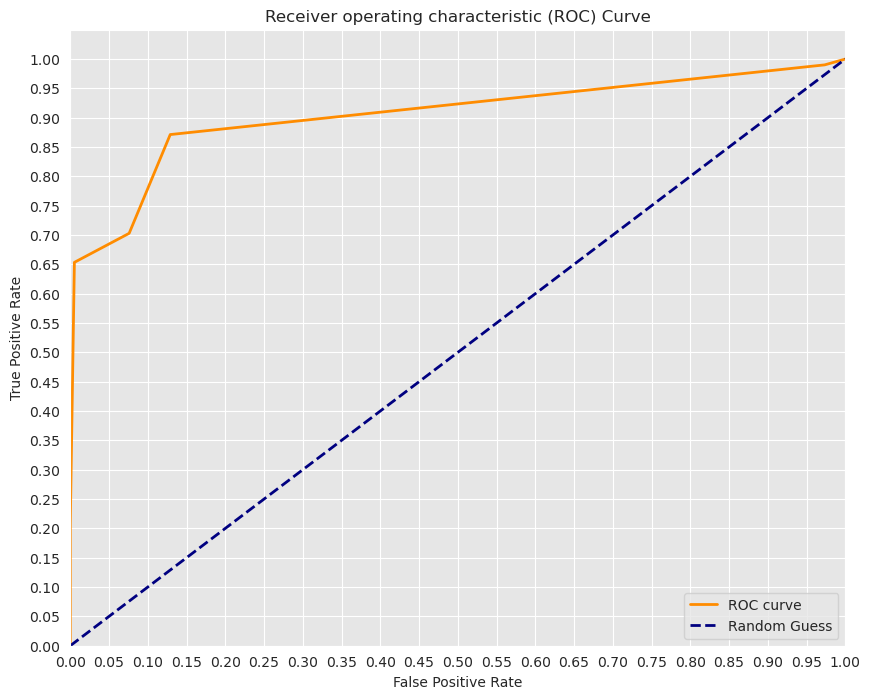

In [66]:
#plotting ROC curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',label="Random Guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 7.6.1 Observation and conclution

1) Excellent Model Performance: The model possesses very high discriminatory power. It is exceptionally good at distinguishing between customers who will churn and those who will stay.
2) High Recall is Achievable: The model can be configured to identify a very high proportion of all true churners (High True Positive Rate/Recall), which is the primary goal of a churn prediction system.
3) Precision is a Tunable Setting: The previous low precision score (55%) is not a fundamental flaw of the model. It is a result of the chosen threshold. The ROC curve proves that by simply adjusting this threshold, precision can be significantly improved without a catastrophic loss in recall.
4) Strong Predictive Ability: The significant bow of the curve towards the top-left corner shows the model's predictions are far superior to random guessing. It is a highly useful and rel
iable tool.